In [1]:
from scipy.io import loadmat
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

mat_data =  loadmat("C:\\Users\\pragu\\OneDrive\\Desktop\\EEG_128channels[1]\\EEG_128channels\\02010004rest 20150427 1335..mat")
filtered_data = []
for i in range(len(mat_data['a02010004rest_20150427_1335mat'])):
    data = mat_data['a02010004rest_20150427_1335mat'][i]
    # data2 = mat_data['Impedances_0']
    print(f'original data = {data}')
    
    sampling_rate = 250 # Example sampling rate in Hz
    lowcut = 0.5
    highcut = 30
    nyquist  = 0.5 * sampling_rate
    eeg_signal = data
    low = lowcut/nyquist
    high = highcut/nyquist

    b, a = signal.butter(4,[low,high], btype= 'bandpass')
    filtered_signal = signal.lfilter(b,a , eeg_signal)
    filtered_data.append(filtered_signal)

    # filtered_signal_2 = signal.filtfilt(b,a , eeg_signal)
    print(f'filtered data = {filtered_signal}')
    print(len(filtered_signal))
    

    # Create a time axis (assuming the signal is sampled regularly)
    sampling_rate = 250 # Example sampling rate in Hz
    time = np.arange(len(data)) / sampling_rate

    # Plot the signal
    # plt.figure(figsize=(10, 6))
    # plt.plot(time, filtered_signal, label = 'filtered eeg signal ')
    # plt.plot(time, data, label = 'original eeg signal' )
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.title('Signal Plot')
    # # plt.legend()
    # plt.grid(True)
    # plt.show()

original data = [-4614.75585938 -4205.94970703 -4111.03515625 ... -1215.47436523
 -1287.75       -1740.17614746]
filtered data = [ -38.8960602  -270.78085112 -892.40113585 ...   10.93065264  -24.86911255
  -32.85193079]
75339
original data = [-6732.62841797 -6352.10253906 -6234.93847656 ... -4317.2265625
 -4346.46630859 -4783.33349609]
filtered data = [  -56.74682003  -396.87134071 -1314.96413576 ...    14.09299314
   -20.55878167   -30.2853318 ]
75339
original data = [-6582.38427734 -6125.74658203 -6071.87207031 ... -5376.89306641
 -5516.69482422 -6110.97558594]
filtered data = [  -55.48046807  -387.30173836 -1281.10356712 ...    17.44353917
   -26.58336652   -30.63748132]
75339
original data = [-8156.36669922 -7798.97314453 -7708.97167969 ... -7270.75927734
 -7327.44384766 -7769.87109375]
filtered data = [  -68.74698029  -481.67031407 -1599.63169775 ...    18.85063247
   -19.02396651   -29.10887484]
75339
original data = [-7179.43603516 -6921.44335938 -6729.00341797 ... -6432.3510742

In [2]:
filtered_data_array = np.array(filtered_data)
print(filtered_data_array)

[[  -38.8960602   -270.78085112  -892.40113585 ...    10.93065264
    -24.86911255   -32.85193079]
 [  -56.74682003  -396.87134071 -1314.96413576 ...    14.09299314
    -20.55878167   -30.2853318 ]
 [  -55.48046807  -387.30173836 -1281.10356712 ...    17.44353917
    -26.58336652   -30.63748132]
 ...
 [ -143.23376567 -1006.28249899 -3352.81165362 ...    28.68702734
     -5.94348082   -16.01841465]
 [  -74.46326506  -520.88712598 -1727.30855958 ...    27.61791087
    -19.95825185   -25.57757293]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


c:\Users\pragu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


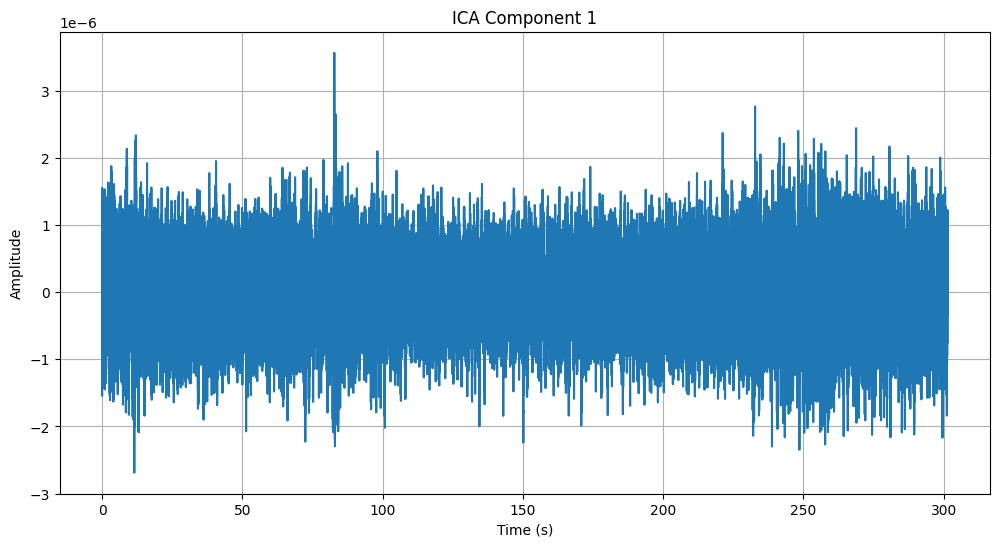

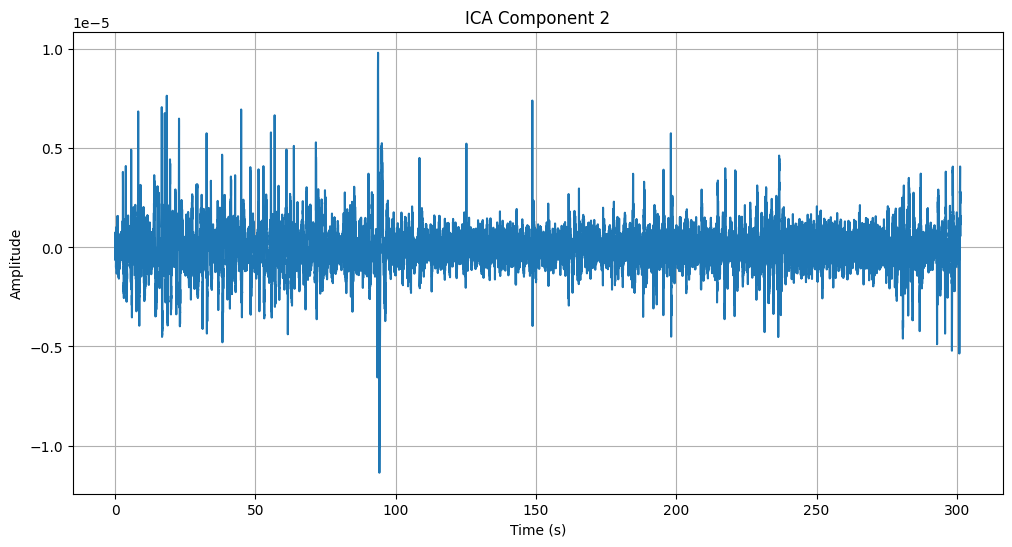

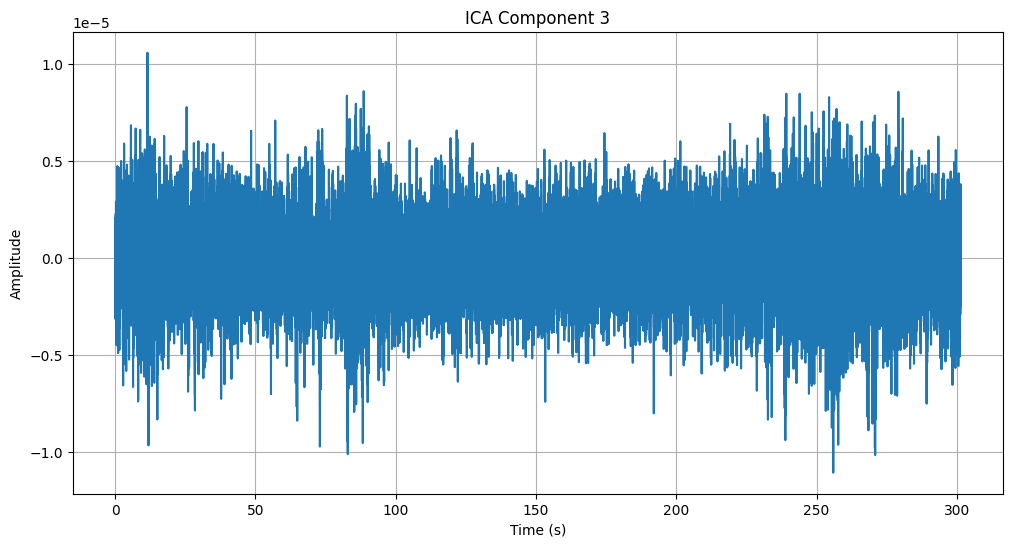

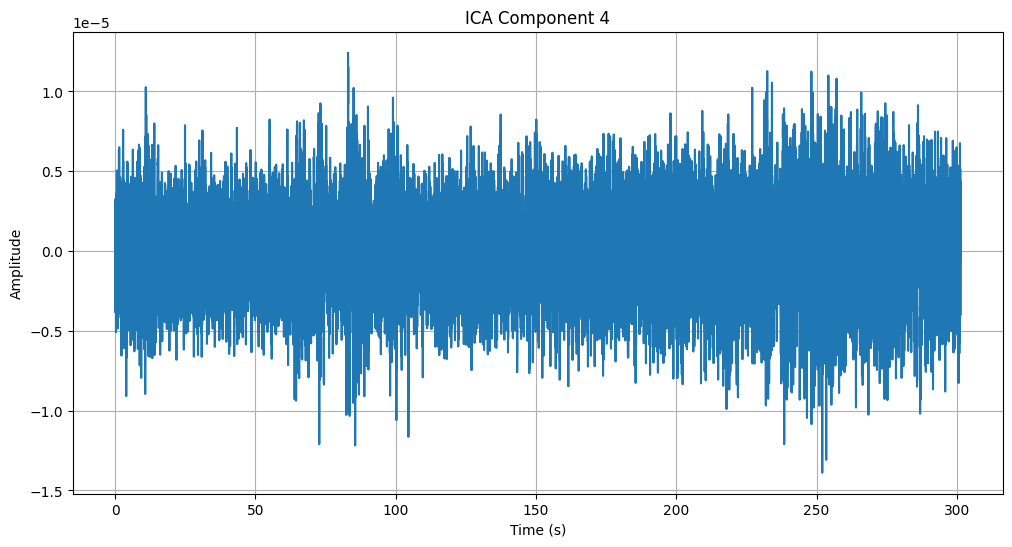

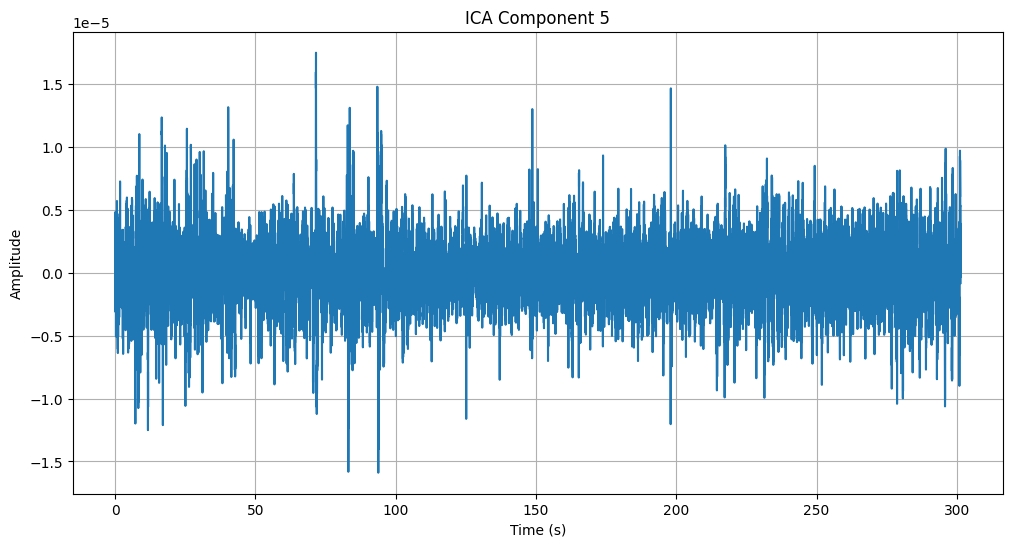

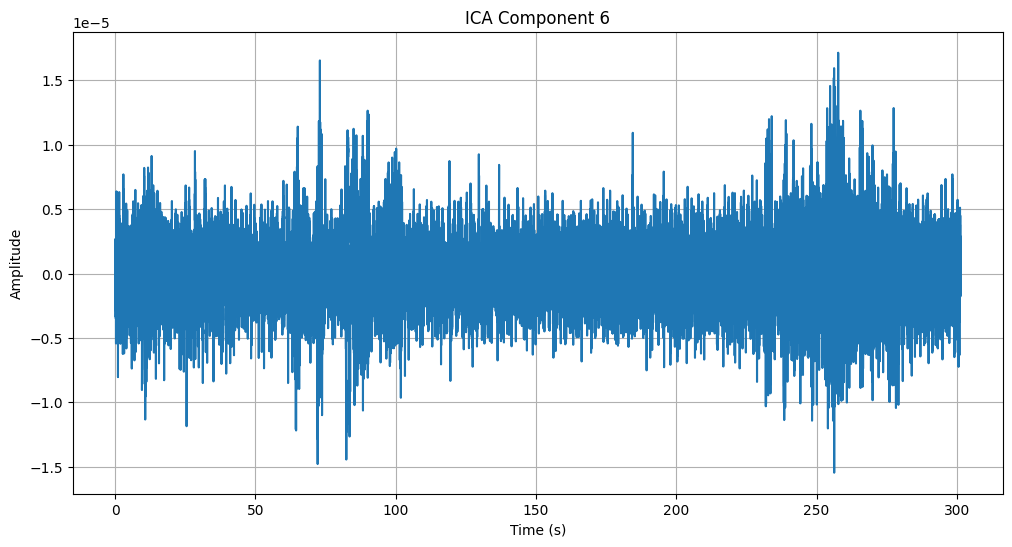

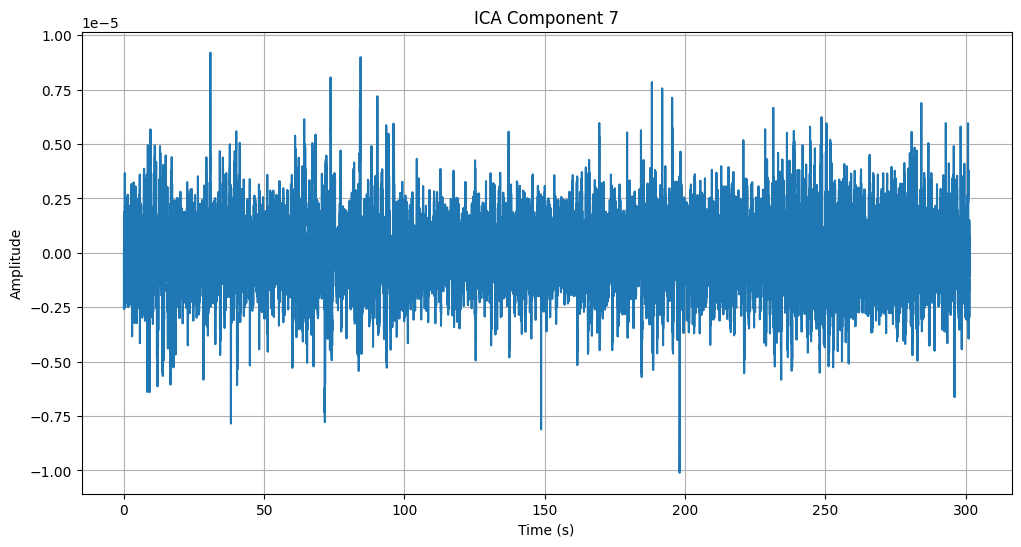

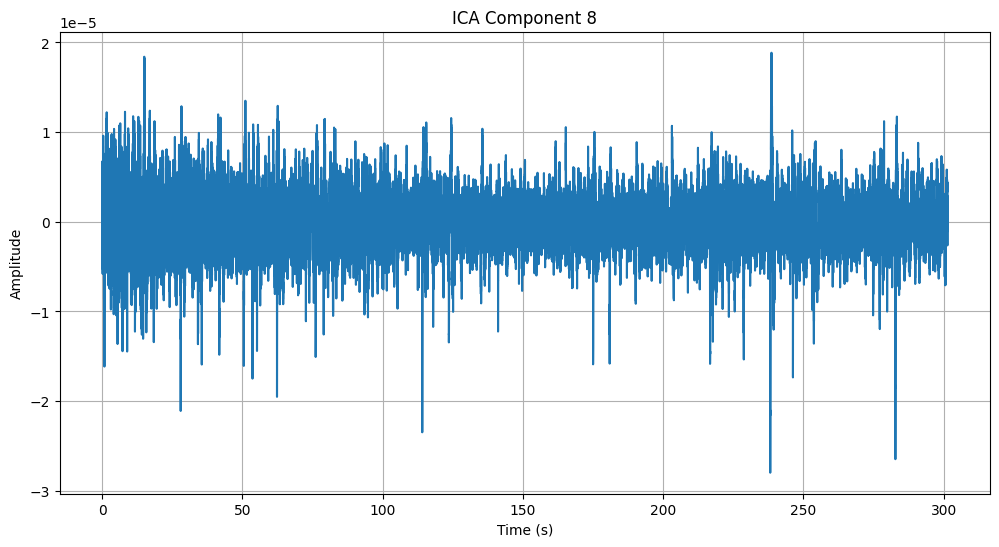

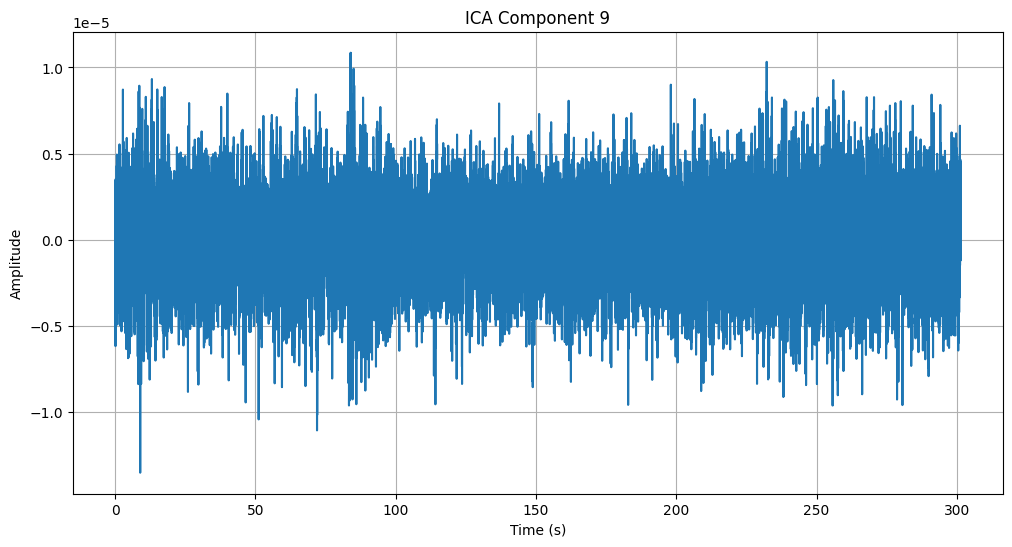

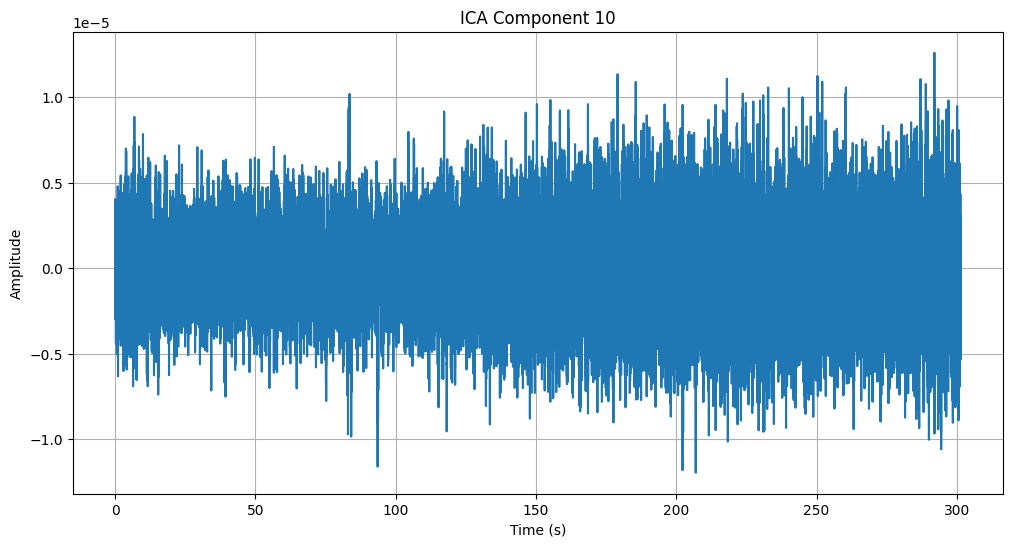

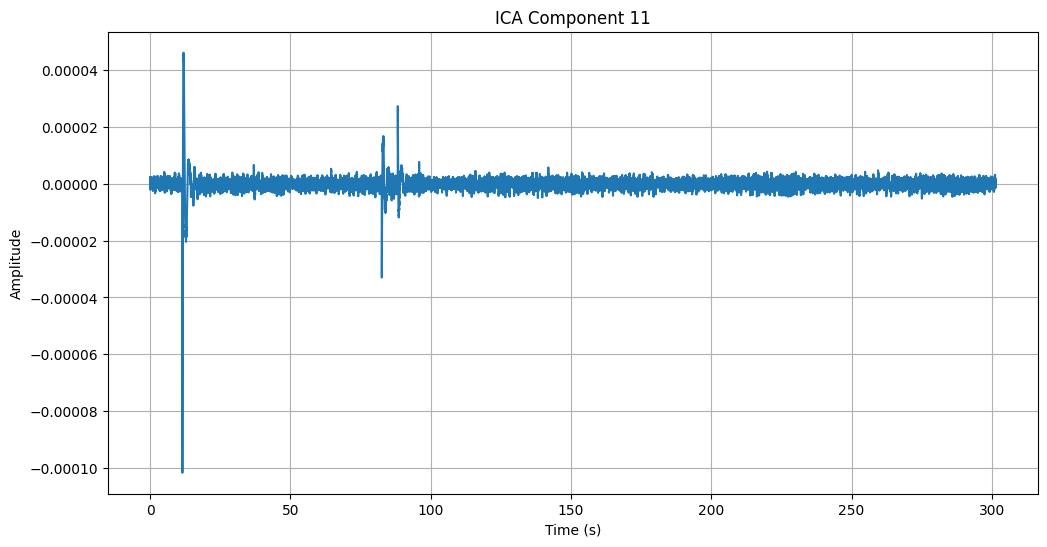

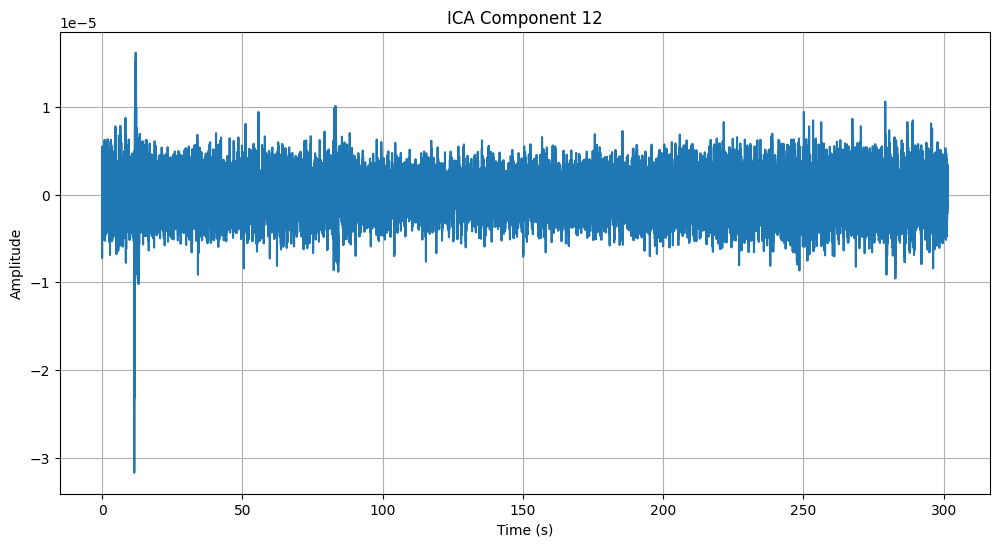

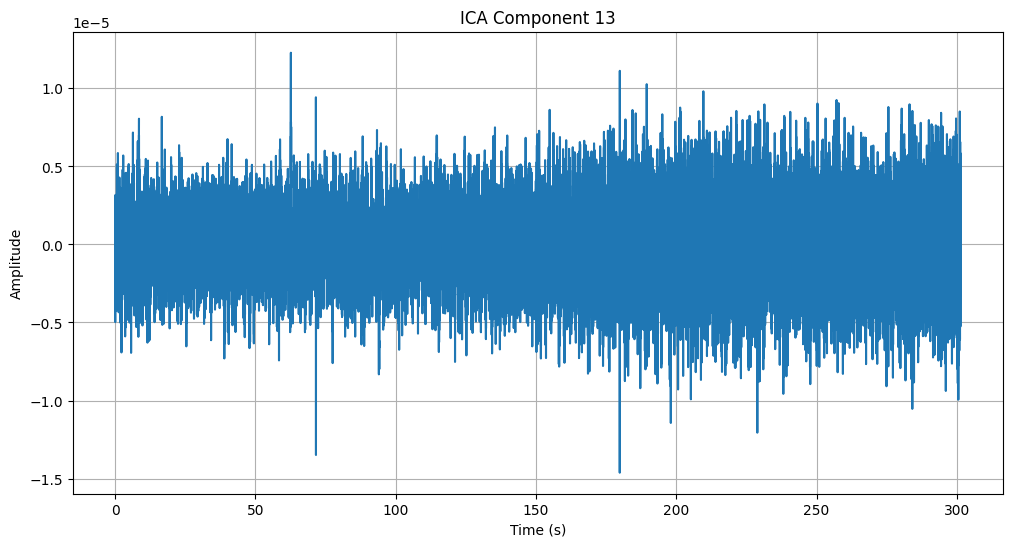

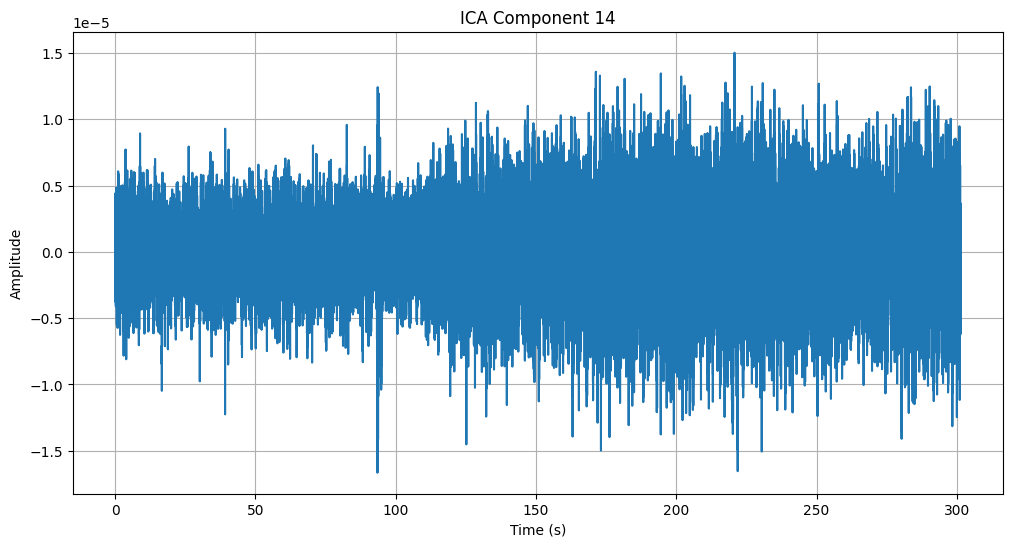

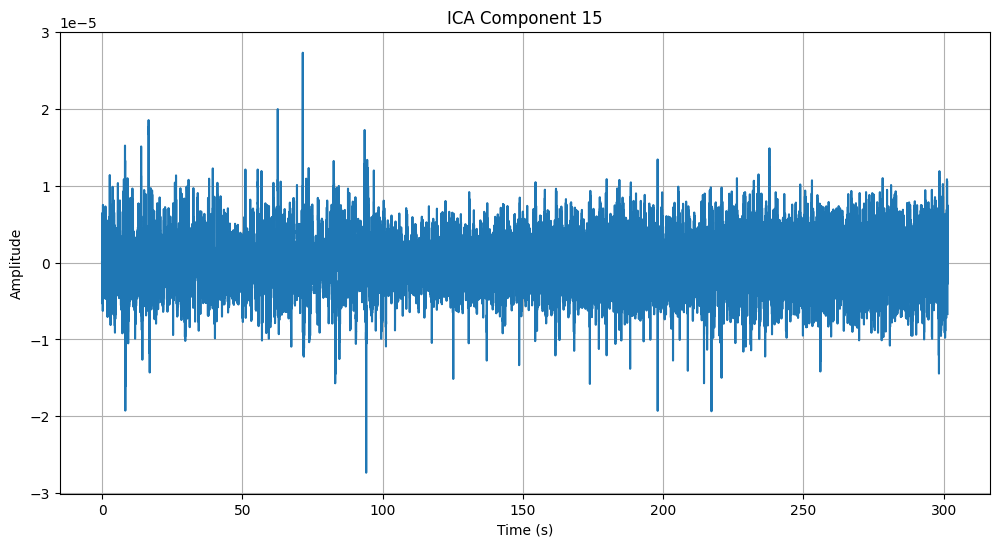

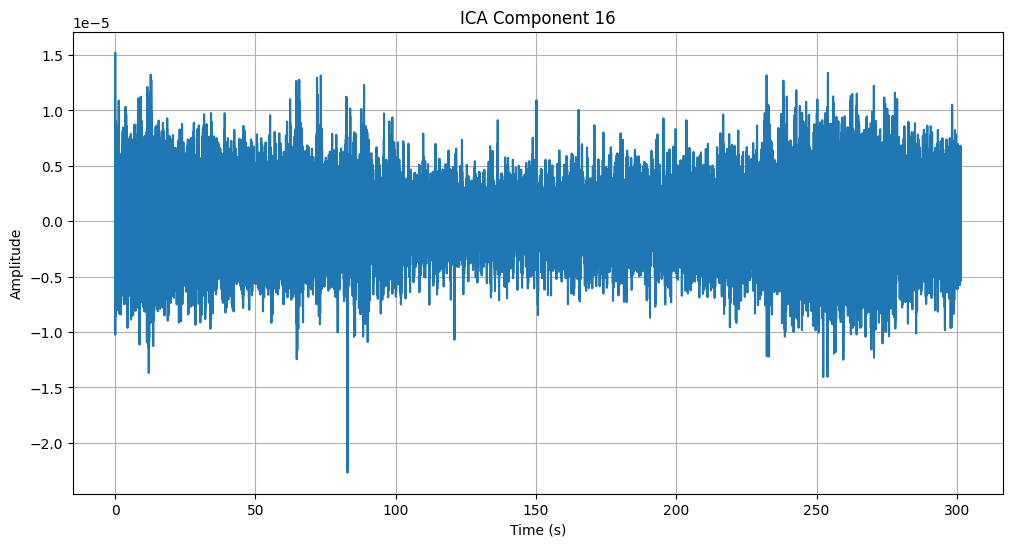

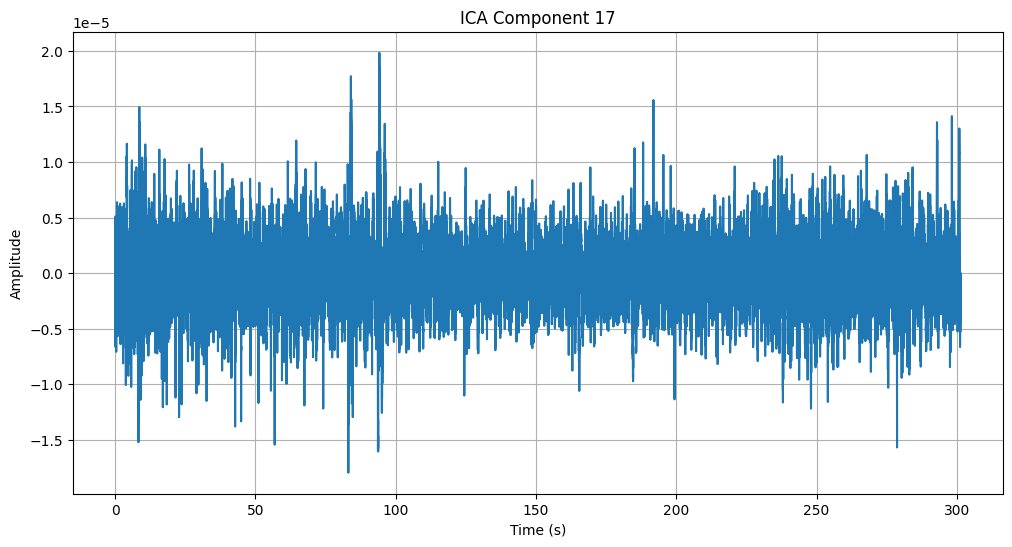

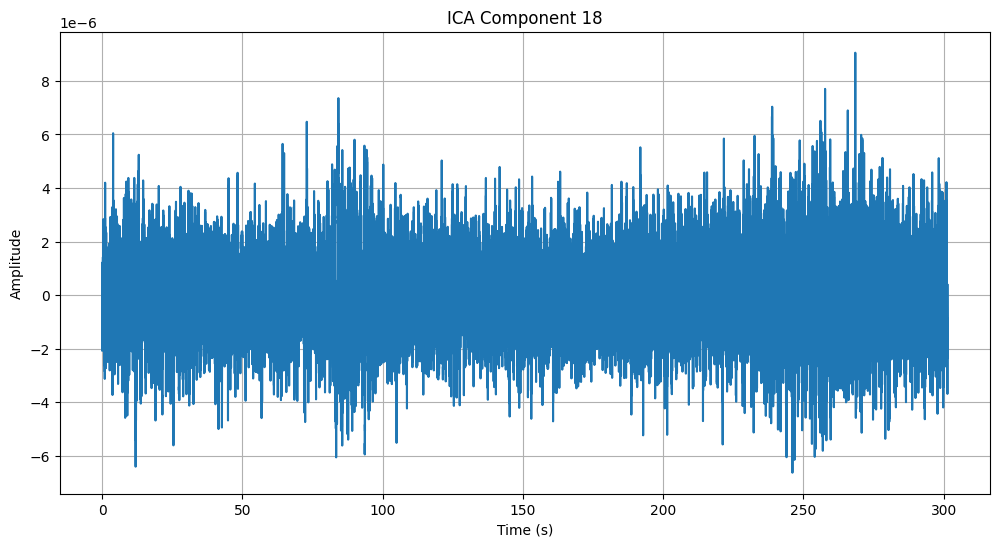

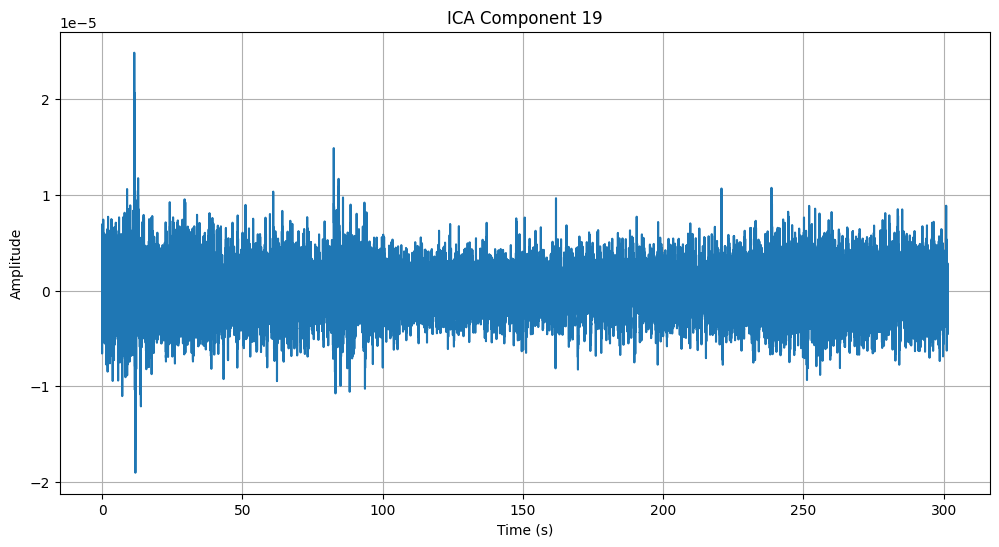

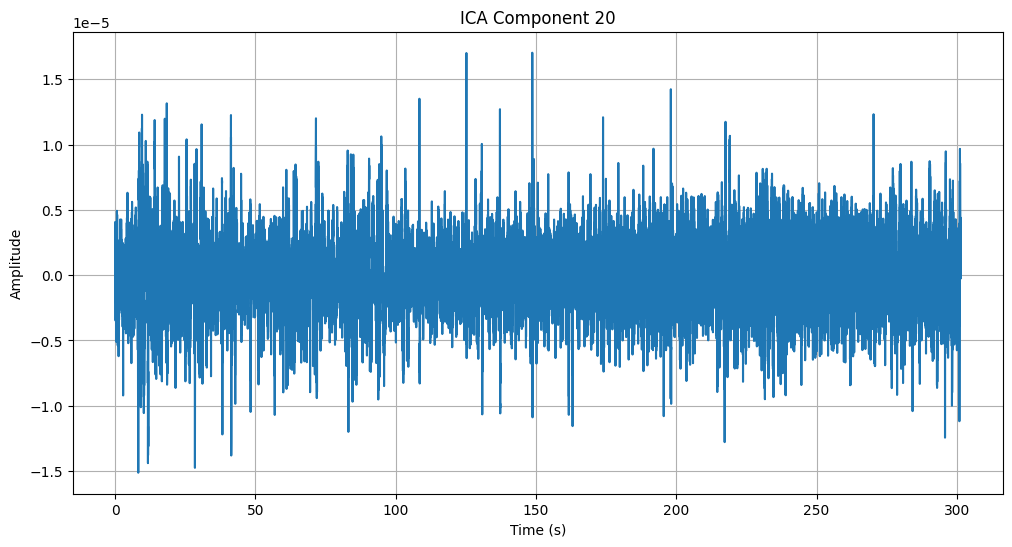

[[ 3.44498725e+01  2.44108100e+02  8.21382457e+02 ... -2.90571918e+00
  -1.18362417e+01 -1.31693961e+01]
 [ 1.65005732e+01  1.17361608e+02  3.96924271e+02 ...  9.86272322e-01
  -7.48915909e+00 -1.09292345e+01]
 [ 1.77828437e+01  1.27062525e+02  4.31216898e+02 ...  5.70143508e+00
  -1.43342147e+01 -1.34620713e+01]
 ...
 [-6.98756346e+01 -4.91283329e+02 -1.63855188e+03 ...  1.41100048e+01
   5.69832212e+00  1.71009499e+00]
 [-1.16455491e+00 -6.29001737e+00 -1.42399840e+01 ...  1.42203564e+01
  -6.20458824e+00 -5.03928886e+00]
 [ 7.32694866e+01  5.14410232e+02  1.71254518e+03 ... -1.35035962e+01
   1.33505984e+01  2.01109549e+01]]
[[ 3.46538136e+01  2.45555620e+02  8.26261709e+02 ... -2.83419786e+00
  -1.18855058e+01 -1.32252696e+01]
 [ 1.68757491e+01  1.20024506e+02  4.05900281e+02 ...  1.11784496e+00
  -7.57978668e+00 -1.10320211e+01]
 [ 1.85115980e+01  1.32235027e+02  4.48652199e+02 ...  5.95700616e+00
  -1.45102528e+01 -1.36617274e+01]
 ...
 [-6.77097303e+01 -4.75910323e+02 -1.5867330

In [3]:
from sklearn.decomposition import FastICA

ica2 = FastICA(n_components=20, random_state= 0)

independant_components = ica2.fit_transform(filtered_data_array)

# Create a time axis (assuming your data is sampled at a constant rate)
n_samples = len(ica2.components_[0, :])
sampling_rate = 250  # Replace with your actual sampling rate in Hz
time = np.arange(n_samples) / sampling_rate

# Loop through each component and plot it separately
for component_idx in range(20):
    component = ica2.components_[component_idx, :]

    plt.figure(figsize=(12, 6))
    plt.plot(time, component)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'ICA Component {component_idx + 1}')
    plt.grid(True)
    plt.show()
    
original_signal = np.dot(independant_components, ica2.mixing_.T)
print(original_signal)
ica_components_filtered = np.delete(independant_components, 10 , axis= 1)
ica2.mixing_ = np.delete(ica2.mixing_.T, 10 , axis=0)
reconstructed_signal = np.dot(ica_components_filtered, ica2.mixing_)
print(reconstructed_signal)

In [4]:
reconstructed_signal_array = np.array(reconstructed_signal)

print(reconstructed_signal_array.shape[0])

129


In [6]:
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt


frequency_bands = {
    'Delta' : (0.5, 4),
    'Theta' : (4, 8),
    'Alpha' : (8, 13),
    'Beta'  : (13, 30),
    'Gamma' : (30, np.inf)
}

# Create a dictionary to store PSD values and frequencies for each electrode and band
electrode_band_data = {electrode: {band: {'frequencies': [], 'psd': []} for band in frequency_bands} for electrode in range(reconstructed_signal.shape[0])}

# Loop through each channel (electrode)
for electrode in range(reconstructed_signal_array.shape[0]):
    electrode_data = reconstructed_signal_array[electrode]

    # Calculate PSD for the current channel
    frequencies, psd = welch(electrode_data, fs=sampling_rate, nperseg=2048)

    # Loop through frequency bands and store PSD values and frequencies
    for band, (low, high) in frequency_bands.items():
        band_indices = np.where((frequencies >= low) & (frequencies < high))
        band_psd = psd[band_indices]
        band_frequencies = frequencies[band_indices]
        electrode_band_data[electrode][band]['frequencies'] = band_frequencies
        electrode_band_data[electrode][band]['psd'] = band_psd

    # Plot the PSD for the current channel
    # plt.figure(figsize=(12, 6))
    # plt.semilogy(frequencies[(frequencies >= 0.1) & (frequencies <= 30)], psd[(frequencies >= 0.1) & (frequencies <= 30)])
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Power/Frequency (dB/Hz)')
    # plt.title('Power Spectral Density (PSD) - Channel {}'.format(channel_number))
    # plt.grid(True)
    # plt.show()
    
for i in range(129):
    print(f"Alpha Band Frequencies for Electrode {i}:", electrode_band_data[i]['Alpha']['frequencies'])
    print(f'Alpha Band psd for Electrode {i}:', electrode_band_data[i]['Alpha']['psd'])

    

Alpha Band Frequencies for Electrode 0: [ 8.05664062  8.17871094  8.30078125  8.42285156  8.54492188  8.66699219
  8.7890625   8.91113281  9.03320312  9.15527344  9.27734375  9.39941406
  9.52148438  9.64355469  9.765625    9.88769531 10.00976562 10.13183594
 10.25390625 10.37597656 10.49804688 10.62011719 10.7421875  10.86425781
 10.98632812 11.10839844 11.23046875 11.35253906 11.47460938 11.59667969
 11.71875    11.84082031 11.96289062 12.08496094 12.20703125 12.32910156
 12.45117188 12.57324219 12.6953125  12.81738281 12.93945312]
Alpha Band psd for Electrode 0: [2.11357067 1.96924628 1.52976364 1.32553356 1.31283967 1.52782371
 1.75989938 1.50697255 1.30457891 1.31874702 1.13613038 1.04813727
 1.1778108  1.08888347 0.77750308 0.8127236  0.80197589 1.19226567
 1.27834925 0.96030194 0.96454936 0.87520473 0.83763912 0.88170246
 0.80314758 0.78362862 0.78598334 0.76759277 0.48454427 0.51053644
 0.52158066 0.53423407 0.50890201 0.67626525 0.64168459 0.5769947
 0.6069418  0.47583732 0.55

In [7]:
import numpy as np
import pywt

# Generate or load your EEG data
# Replace this with your actual EEG data
# Example: Simulated EEG data as a placeholder
eeg_data = reconstructed_signal_array  # 1000 time points, 128 electrodes

# Define the wavelet and level of decomposition
wavelet_name = 'db4'  # You can choose a different wavelet as needed
level = 5

# Initialize an empty list to store wavelet energy for each electrode
wavelet_energy_per_electrode = []

# Calculate wavelet energy for each electrode
for electrode_data in eeg_data:  # Iterate over columns (electrodes)
    # Perform discrete wavelet decomposition
    coeffs = pywt.wavedec(electrode_data, wavelet_name, level=level)
    
    # Calculate the energy for each detail coefficient (excluding the approximation coefficient)
    energy_per_detail = [np.sum(np.abs(detail) ** 2) for detail in coeffs[1:]]
    
    # Total wavelet energy for the electrode is the sum of the energies of detail coefficients
    total_energy = np.sum(energy_per_detail)
    
    wavelet_energy_per_electrode.append(total_energy)

# Now, wavelet_energy_per_electrode contains the wavelet energy for each electrode
print("Wavelet Energy for Each Electrode:")
print(wavelet_energy_per_electrode)

Wavelet Energy for Each Electrode:
[48228418.10969569, 16520947.334769437, 25131697.987477183, 4599948.903569719, 10492255.932826515, 25757971.290609982, 15805615.392620612, 87430839.43244767, 22137819.687472943, 24232657.084768243, 12092548.441161484, 156950142.4823483, 8650348.995404288, 27441771.687550053, 57824836.56839771, 15289217.237207163, 18824363.645432115, 80236551.03828731, 66854372.33949659, 193465653.3943015, 51390345.82664563, 18347031.034203503, 38922013.84702029, 20703737.915249962, 50482304.41235314, 16140367.226236867, 77473731.56385261, 97446096.75809374, 3827191.76892721, 43910219.02288864, 51935754.4866058, 33952365.401064634, 12313588.315736542, 20580214.720048964, 47808575.501241885, 14511618.215520293, 47670036.16533125, 12969942.61837522, 101102706.14678463, 42934593.52732078, 3279293.4339630594, 79444755.83479421, 24094971.254188437, 684626.3969451404, 87979458.89388812, 63003500.87249345, 6414425.545811004, 39569422.162718594, 11141504.091026202, 41127032.01

In [8]:
def higuchi_fd(signal, k_max):
    N = len(signal)
    Lmk = np.zeros((k_max,))

    for k in range(1, k_max + 1):
        Lm = 0.0
        for m in range(1, k + 1):
            Lmk_temp = 0.0
            for i in range(1, int((N - m) / k) + 1):
                Lmk_temp += abs(signal[m + i * k - 1] - signal[m + (i - 1) * k - 1])
            Lmk_temp *= (N - 1) / (((N - m) / k) * k)
            Lm += Lmk_temp

        Lm /= k
        Lmk[k - 1] = Lm

    HFD = np.log(Lmk[1:] / Lmk[:-1]) / np.log(1.0 / np.arange(2, k_max + 1))
    return HFD.mean()

k_max = 20 # Adjust as needed

fractal_dimensions = []

for electrode_data in reconstructed_signal_array:
    hfd_value = higuchi_fd(electrode_data, k_max)
    fractal_dimensions.append(hfd_value)

# Now, fractal_dimensions contains the Higuchi Fractal Dimension for each electrode
print("Higuchi Fractal Dimensions for Each Electrode:")
print(fractal_dimensions)

Higuchi Fractal Dimensions for Each Electrode:
[0.09262473704708299, 0.09061702110161889, 0.11163537800218717, 0.09909801260034555, 0.10382671212715205, 0.12493824094609013, 0.13621466206136315, 0.09187021051169754, 0.08430846836700077, 0.1150932488935957, 0.10953332732928545, 0.10506548936104575, 0.10861703189700908, 0.09214545009306015, 0.10076665180740388, 0.10993953941055119, 0.10440156259011008, 0.09946686511593883, 0.10349038763946564, 0.09337992906252933, 0.07880832549495072, 0.0965195686603476, 0.11285736365122782, 0.1109990240859408, 0.07384661202986453, 0.11908998213646475, 0.10860258387873414, 0.09935124958383869, 0.11707293183292533, 0.12896112245552777, 0.13352270855682824, 0.11865883431606256, 0.1205149342715217, 0.10872076307304038, 0.09736764141296692, 0.10394751716469491, 0.11101866107314522, 0.1265580999658169, 0.11024857996007502, 0.10111500816473717, 0.09445392996715722, 0.0991164266717158, 0.12360197003838233, 0.11365447135203521, 0.10092097812712131, 0.08946538311

In [9]:
import numpy as np

def hjorth_parameters(eeg_signal):
    num_channels = eeg_signal.shape[0]
    hjorth_params = []

    for channel in range(num_channels):
        channel_data = eeg_signal[channel, :]
        
        # Calculate Hjorth Activity (M0)
        M0 = np.var(channel_data)

        # Calculate Hjorth Mobility (M1)
        diff_signal = np.diff(channel_data)
        M1 = np.sqrt(np.var(diff_signal) / np.var(channel_data))

        # Calculate Hjorth Complexity (M2)
        diff2_signal = np.diff(diff_signal)
        M2 = np.sqrt(np.var(diff2_signal) / np.var(diff_signal))

        hjorth_params.append((M0, M1, M2))

    return hjorth_params

hjorth_params = hjorth_parameters(reconstructed_signal_array)

for channel, params in enumerate(hjorth_params):
    print(f"Channel {channel + 1}:")
    print("Hjorth Activity (M0):", params[0])
    print("Hjorth Mobility (M1):", params[1])
    print("Hjorth Complexity (M2):", params[2])


Channel 1:
Hjorth Activity (M0): 6274.927947730557
Hjorth Mobility (M1): 0.13699599580400917
Hjorth Complexity (M2): 0.8959500826741248
Channel 2:
Hjorth Activity (M0): 1895.6756191777113
Hjorth Mobility (M1): 0.18695667089772344
Hjorth Complexity (M2): 1.0451023445163543
Channel 3:
Hjorth Activity (M0): 2089.001300728961
Hjorth Mobility (M1): 0.32021230747078766
Hjorth Complexity (M2): 1.1325295823053665
Channel 4:
Hjorth Activity (M0): 289.76469156023967
Hjorth Mobility (M1): 0.3944693198098134
Hjorth Complexity (M2): 1.1430785716383367
Channel 5:
Hjorth Activity (M0): 1044.2677765309143
Hjorth Mobility (M1): 0.2536399214114125
Hjorth Complexity (M2): 1.101494235997775
Channel 6:
Hjorth Activity (M0): 1697.513297877113
Hjorth Mobility (M1): 0.41384100750473657
Hjorth Complexity (M2): 1.1505148279398416
Channel 7:
Hjorth Activity (M0): 235.98343022849062
Hjorth Mobility (M1): 1.0895885301405757
Hjorth Complexity (M2): 1.1742681386344724
Channel 8:
Hjorth Activity (M0): 8263.6984107173

In [11]:
import numpy as np
from scipy.spatial.distance import euclidean
from math import log, factorial

def fuzzy_entropy(time_series, m, r):
    N = len(time_series)
    embedded_series = embed(time_series, m)
    sim_counts = count_similar(embedded_series, r)
    probs = sim_counts / (N - m + 1)
    fuzzy_ent = -log(np.mean(probs[:-1] / probs[1:]))
    return fuzzy_ent

def embed(time_series, m):
    return np.array([time_series[i:(i+m)] for i in range(len(time_series)-m+1)])

def count_similar(embedded_series, r):
    N = len(embedded_series)
    counts = np.zeros(N)
    for i in range(N):
        for j in range(N):
            if i != j:
                dist = euclidean(embedded_series[i], embedded_series[j])
                if dist <= r:
                    counts[i] += 1
    return counts

# Assuming you have loaded your EEG data into a variable eeg_data
m = 2  # Embedding dimension
r = 6  # Tolerance (20% of the standard deviation of the EEG data)
fuzzy_entropies = []
for electrode_data in eeg_data:
    entropy = fuzzy_entropy(electrode_data, m, r)
    fuzzy_entropies.append(entropy)
